In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Gemstone_7_3_25.csv')
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,class_label
0,0.909499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000037,0.000075,0.000150,...,0.513936,0.051240,0.167423,0.000165,0.000635,4.519627e-06,-2.366830e-10,-5.491861e-08,-5.119065e-11,Alexandrite
1,0.784037,0.000000,0.000000,0.002600,0.000000,0.011594,0.000000,0.000000,0.005243,0.000000,...,0.407965,0.091808,0.165255,0.000784,0.000001,1.780639e-08,2.296774e-15,-1.321221e-10,1.209063e-15,Alexandrite
2,0.970037,0.000763,0.001145,0.001145,0.001145,0.016180,0.000725,0.000280,0.002811,0.000114,...,0.678786,0.059389,0.161916,0.000017,0.000200,2.302139e-07,-1.551670e-12,-3.928424e-10,1.949298e-13,Alexandrite
3,0.810393,0.000947,0.000451,0.000857,0.000676,0.003292,0.001398,0.000721,0.002660,0.001939,...,0.421959,0.058819,0.233047,0.018589,0.000935,1.165659e-04,-3.661311e-08,-1.569542e-05,-1.184129e-08,Alexandrite
4,0.953279,0.000772,0.001524,0.001440,0.001586,0.010603,0.002066,0.000637,0.003652,0.000950,...,0.618850,0.043358,0.175302,0.000993,0.001322,4.422983e-05,1.066917e-08,1.394016e-06,-7.613963e-10,Alexandrite


In [3]:
df.shape

(4400, 114)

In [4]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03,4.400000e+03
mean,0.910203,0.038948,0.031833,0.049896,0.049223,0.031963,0.027442,0.011332,0.011815,0.011281,...,0.032860,0.629254,0.042688,0.208047,3.055917e-02,6.663420e-02,2.170023e-02,-1.305095e-01,-2.926652e-02,1.112063e-01
std,0.103440,0.093350,0.077971,0.110528,0.118686,0.083630,0.086653,0.043165,0.043773,0.042393,...,0.011712,0.121987,0.020280,0.257015,5.184940e-01,2.045794e+00,4.551522e-01,1.170291e+01,1.285540e+00,6.807097e+00
min,0.221033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003408,0.246278,0.002692,0.159156,3.734931e-12,1.860566e-12,1.450631e-14,-7.433449e+02,-7.568195e+01,-1.847178e+01
25%,0.878111,0.000234,0.000231,0.000617,0.000390,0.000866,0.000310,0.000117,0.000213,0.000043,...,0.024748,0.541185,0.027827,0.162905,3.140544e-04,5.062571e-06,5.317039e-08,-1.881953e-13,-4.187325e-09,-1.807570e-12
50%,0.949166,0.002179,0.001923,0.003351,0.002512,0.004860,0.002073,0.000759,0.001338,0.000425,...,0.032129,0.635631,0.039773,0.166852,1.403253e-03,4.503525e-05,6.771743e-07,2.466397e-16,3.125455e-12,9.888760e-21
75%,0.980674,0.024516,0.020739,0.033070,0.025547,0.019650,0.011877,0.003988,0.004556,0.002724,...,0.040196,0.718761,0.053831,0.178625,3.878343e-03,2.617080e-04,8.011981e-06,1.271894e-11,3.057515e-08,1.281236e-12
max,1.000000,0.824824,0.798962,0.951546,0.924301,0.849163,0.871359,0.761084,0.699037,0.734506,...,0.089616,0.957475,0.163229,9.657543,2.145177e+01,1.218662e+02,1.852107e+01,1.653339e+02,7.583178e+00,4.489482e+02


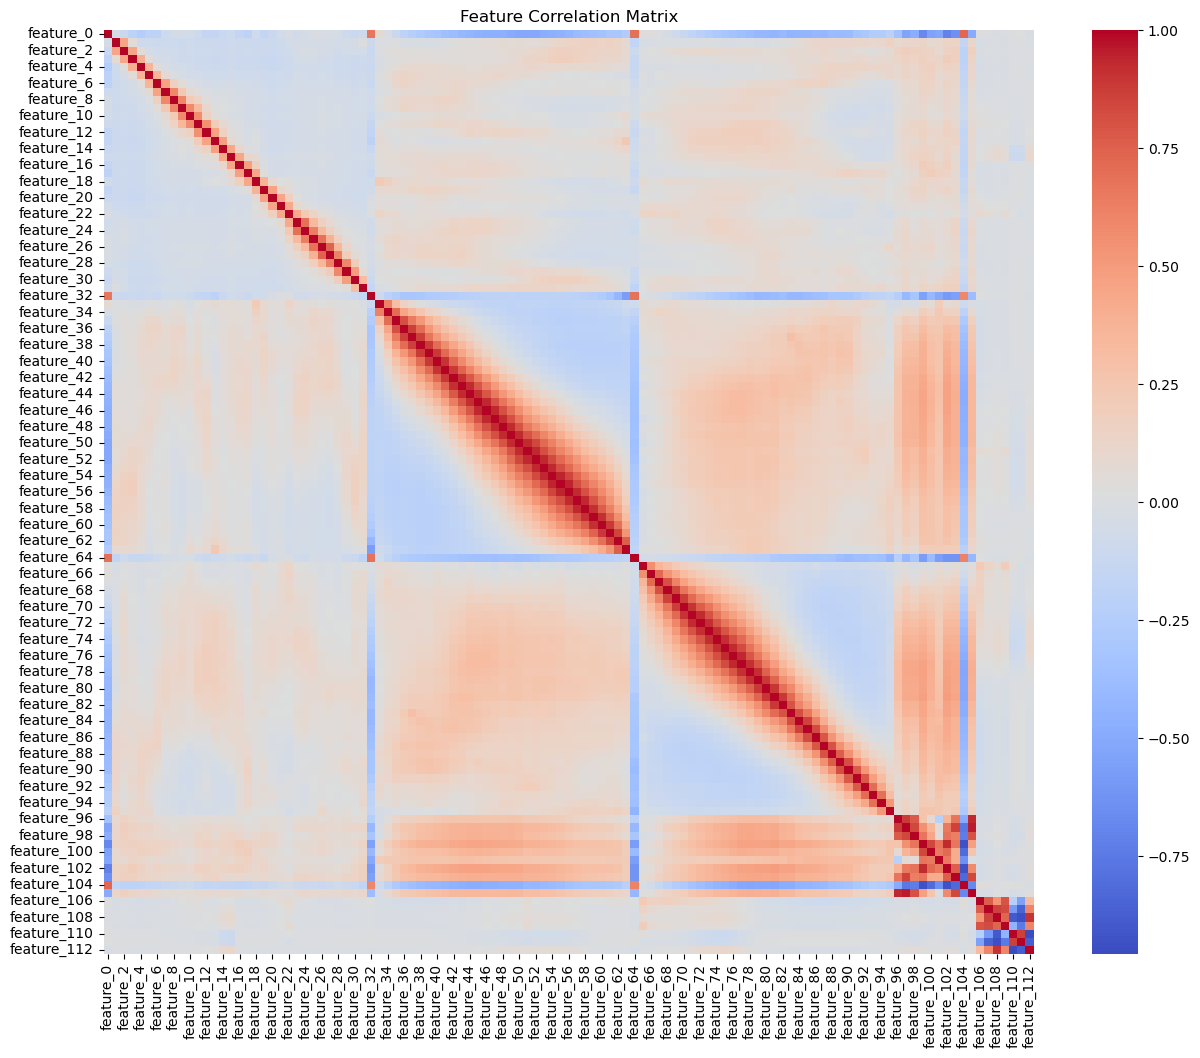

In [13]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

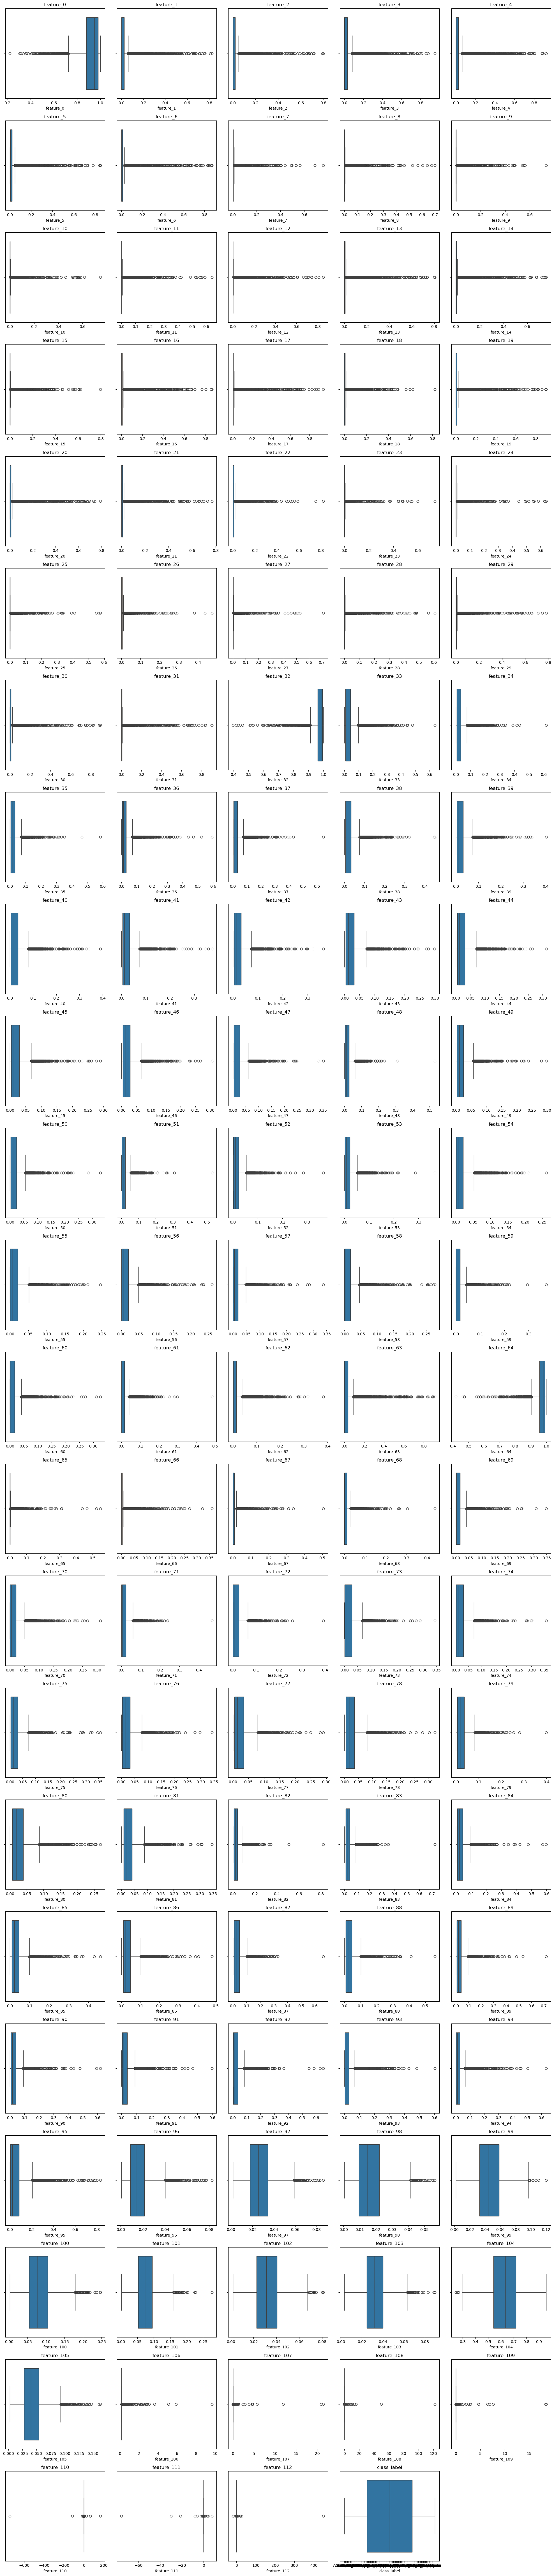

In [95]:
import math
num_cols = len(df.columns)
ncols = 5  # Number of subplots per row
nrows = math.ceil(num_cols / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
X = df.drop('class_label', axis=1)
y = df['class_label']

In [ ]:
num_cols = len(df.columns)
ncols = 5  # Number of subplots per row
nrows = math.ceil(num_cols / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
le = StandardScaler()
X_train_sc = le.fit_transform(X_train)
X_test_le = le.transform(X_test)

In [125]:
pt = PowerTransformer(method='yeo-johnson')
X_train_boxcox = pt.fit_transform(X_train_sc+0.000001)
X_test_boxcox = pt.transform(X_test_sc+0.000001)

In [127]:
pca = PCA()
X_train_trf = X_train_boxcox
X_test_trf = X_test_boxcox

# Checked on different n_components, the accuracy drops

In [129]:
lr = LogisticRegression(max_iter=1000, penalty='l1', C=1.0, solver='liblinear', random_state=42)

lr.fit(X_train_trf, y_train)

y_pred_lr = lr.predict(X_test_trf)

accuracy_score(y_test, y_pred_lr)

0.5829545454545455

In [153]:
print(classification_report(y_test, y_pred_lr))

                   precision    recall  f1-score   support

      Alexandrite       0.25      0.09      0.13        11
        Almandine       0.33      0.17      0.22        12
        Amazonite       0.18      0.29      0.22         7
            Amber       0.55      0.38      0.44        16
         Amethyst       0.38      0.56      0.45         9
         Ametrine       0.67      0.83      0.74        12
       Andalusite       0.40      0.40      0.40        10
        Andradite       0.38      0.38      0.38         8
       Aquamarine       0.46      0.46      0.46        13
 Aventurine Green       0.73      0.62      0.67        13
Aventurine Yellow       0.86      0.75      0.80         8
        Benitoite       0.55      0.46      0.50        13
     Beryl Golden       0.50      0.22      0.31         9
          Bixbite       0.70      0.70      0.70        10
       Bloodstone       0.50      0.50      0.50         8
  Blue Lace Agate       1.00      0.80      0.89       

In [133]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)

y_pred_knn = knn.predict(X_test_trf)

accuracy_score(y_test, y_pred_knn)

C:\Users\hamad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hamad\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\hamad\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

0.5022727272727273

In [135]:
rfc = RandomForestClassifier()

rfc.fit(X_train_trf, y_train)

y_pred_rfc = rfc.predict(X_test_trf)

accuracy_score(y_test, y_pred_rfc)

0.5886363636363636

In [151]:
print(classification_report(y_test, y_pred_rfc))

                   precision    recall  f1-score   support

      Alexandrite       0.50      0.36      0.42        11
        Almandine       0.67      0.33      0.44        12
        Amazonite       0.30      0.43      0.35         7
            Amber       0.56      0.31      0.40        16
         Amethyst       0.54      0.78      0.64         9
         Ametrine       0.67      0.83      0.74        12
       Andalusite       0.62      0.50      0.56        10
        Andradite       0.50      0.50      0.50         8
       Aquamarine       0.56      0.69      0.62        13
 Aventurine Green       0.73      0.62      0.67        13
Aventurine Yellow       0.75      0.75      0.75         8
        Benitoite       0.56      0.38      0.45        13
     Beryl Golden       0.25      0.22      0.24         9
          Bixbite       0.56      0.90      0.69        10
       Bloodstone       0.40      0.50      0.44         8
  Blue Lace Agate       0.71      1.00      0.83       